#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
#for text pre-processing
import seaborn as sns
import re, string
import nltk
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import SnowballStemmer
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')

In [ ]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

# EDA - Encrypted Movie Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/FY_Project_Phase 1/encFile2.csv")

In [ ]:
df.head()

,sentiment1,clean_text1
0,1,239491220110098 134471009875413007100981799810...
1,1,1799823949122014680100981344716122910115562 15...
2,1,18150512913007122015776 1799823949122014680100...
3,0,2052116885301213007247451688515562155624868 16...
4,1,114801009818150181501009813447 111316885181501...


In [ ]:
df_train=df[:222]
df_test=df[222:]

In [ ]:
df_train.shape

(222, 2)

In [ ]:
df_test.shape

(100, 2)

0    126
1     96
Name: sentiment1, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='sentiment1'>

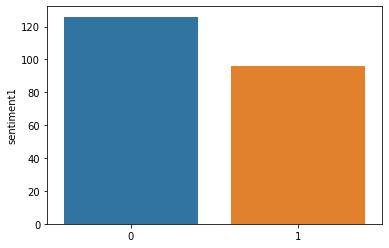

In [ ]:
x=df_train['sentiment1'].value_counts()
print(x)
sns.barplot(x.index,x)

In [ ]:
def finalpreprocess(string):
    return (string)
df_train.head()

,sentiment1,clean_text1
0,1,239491220110098 134471009875413007100981799810...
1,1,1799823949122014680100981344716122910115562 15...
2,1,18150512913007122015776 1799823949122014680100...
3,0,2052116885301213007247451688515562155624868 16...
4,1,114801009818150181501009813447 111316885181501...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train["clean_text1"],df_train["sentiment1"],test_size=0.2,shuffle=True)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
X_test_vectors_tfidf

<45x5663 sparse matrix of type '<class 'numpy.float64'>'
	with 3255 stored elements in Compressed Sparse Row format>

# Classification of Encrypted Data

## Naive Bayes

In [ ]:
# FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nb_tfidf = MultinomialNB()
start = time.time()
nb_tfidf.fit(X_train_vectors_tfidf, y_train) 
end = time.time() 
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
score_nb = round(accuracy_score(y_predict,y_test)*100,2)
print("The accuracy score is: " + str(score_nb)) 
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

from sklearn.metrics import f1_score
print("f1 score ",f1_score(y_test, y_predict, average='macro'))
from sklearn.metrics import precision_score
print("precision  ",precision_score(y_test, y_predict, average='macro'))
from sklearn.metrics import recall_score
print("recall ",recall_score(y_test, y_predict, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")


The accuracy score is: 51.11
              precision    recall  f1-score   support

           0       0.51      1.00      0.68        23
           1       0.00      0.00      0.00        22

    accuracy                           0.51        45
   macro avg       0.26      0.50      0.34        45
weighted avg       0.26      0.51      0.35        45

Confusion Matrix: [[23  0]
 [22  0]]
f1 score  0.338235294117647
precision   0.25555555555555554
recall  0.5
AUC: 0.7944664031620553
The time of execution of above program is : 3.8106441497802734 ms


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
for x in range(200):
  rf = RandomForestClassifier(random_state=x)
  start = time.time()
  rf.fit(X_train_vectors_tfidf,y_train)
  end = time.time()
  Y_pred_rf = rf.predict(X_test_vectors_tfidf)
  current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
  if(current_accuracy>max_accuracy): 
    max_accuracy = current_accuracy 
    best_x = x

In [ ]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_vectors_tfidf,y_train)
Y_pred_rf = rf.predict(X_test_vectors_tfidf)


In [ ]:
y_prob = rf.predict_proba(X_test_vectors_tfidf)[:,1]

In [ ]:
print (Y_pred_rf.shape)

(45,)


In [ ]:
score_rf = round(accuracy_score (Y_pred_rf,y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")
print(classification_report(y_test,Y_pred_rf))
print('Confusion Matrix:',confusion_matrix(y_test, Y_pred_rf))


from sklearn.metrics import f1_score
print("f1 score ",f1_score(y_test, Y_pred_rf, average='macro'))
from sklearn.metrics import precision_score
print("precision  ",precision_score(y_test, Y_pred_rf, average='macro'))
from sklearn.metrics import recall_score
print("recall ",recall_score(y_test, Y_pred_rf, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The accuracy score achieved using Random Forest is: 68.89 %
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        23
           1       1.00      0.36      0.53        22

    accuracy                           0.69        45
   macro avg       0.81      0.68      0.65        45
weighted avg       0.81      0.69      0.65        45

Confusion Matrix: [[23  0]
 [14  8]]
f1 score  0.65
precision   0.8108108108108107
recall  0.6818181818181819
AUC: 0.8221343873517787
The time of execution of above program is : 169.36564445495605 ms


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
start = time.time()
lr.fit(X_train_vectors_tfidf,y_train)
end = time.time()
Y_pred_lr = lr.predict(X_test_vectors_tfidf)


In [ ]:
y_prob = lr.predict_proba(X_test_vectors_tfidf)[:,1]

In [ ]:
Y_pred_lr.shape

(45,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)
print("The accuracy score is: " + str(score_lr))
print(classification_report(y_test,Y_pred_lr))
print('Confusion Matrix:',confusion_matrix(y_test, Y_pred_lr))

from sklearn.metrics import f1_score
print("f1 score ",f1_score(y_test, Y_pred_lr, average='macro'))
from sklearn.metrics import precision_score
print("precision  ",precision_score(y_test, Y_pred_lr, average='macro'))
from sklearn.metrics import recall_score
print("recall ",recall_score(y_test, Y_pred_lr, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The accuracy score is: 51.11
              precision    recall  f1-score   support

           0       0.51      1.00      0.68        23
           1       0.00      0.00      0.00        22

    accuracy                           0.51        45
   macro avg       0.26      0.50      0.34        45
weighted avg       0.26      0.51      0.35        45

Confusion Matrix: [[23  0]
 [22  0]]
f1 score  0.338235294117647
precision   0.25555555555555554
recall  0.5
AUC: 0.8260869565217392
The time of execution of above program is : 31.726598739624023 ms


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(200):
  dt = DecisionTreeClassifier(random_state=x)
  start = time.time() 
  dt.fit(X_train_vectors_tfidf,y_train)
  end = time.time()
  Y_pred_dt = dt.predict(X_test_vectors_tfidf)
  current_accuracy = round(accuracy_score (Y_pred_dt,y_test)*100,2)
  if(current_accuracy>max_accuracy): 
    max_accuracy = current_accuracy 
    best_x = x

In [ ]:
#print(max_accuracy) #print (best_x)
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_vectors_tfidf,y_train)
Y_pred_dt = dt.predict(X_test_vectors_tfidf)


In [ ]:
y_prob = dt.predict_proba(X_test_vectors_tfidf)[:,1]

In [ ]:
print (Y_pred_dt.shape)

(45,)


In [ ]:
score_dt = round(accuracy_score (Y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
print(classification_report(y_test,Y_pred_dt))
print('Confusion Matrix:',confusion_matrix(y_test, Y_pred_dt))

from sklearn.metrics import f1_score
print("f1 score ",f1_score(y_test, Y_pred_dt, average='macro'))
from sklearn.metrics import precision_score
print("precision  ",precision_score(y_test, Y_pred_dt, average='macro'))
from sklearn.metrics import recall_score
print("recall ",recall_score(y_test, Y_pred_dt, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The accuracy score achieved using Decision Tree is: 71.11 %
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        23
           1       0.71      0.68      0.70        22

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45

Confusion Matrix: [[17  6]
 [ 7 15]]
f1 score  0.7105393369619001
precision   0.7113095238095238
recall  0.7104743083003953
AUC: 0.710474308300395
The time of execution of above program is : 17.670154571533203 ms


## SVM

In [ ]:
from sklearn import svm
sv=svm.SVC(kernel='linear')
start = time.time()
sv.fit(X_train_vectors_tfidf,y_train)
end = time.time()
Y_pred_svm = sv.predict(X_test_vectors_tfidf) 

In [ ]:
Y_pred_svm.shape

(45,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)
print("The accuracy score is: " + str(score_svm))
print(classification_report(y_test,Y_pred_svm))
print('Confusion Matrix:',confusion_matrix(y_test, Y_pred_svm))


from sklearn.metrics import f1_score
print("f1 score ",f1_score(y_test, Y_pred_svm, average='macro'))
from sklearn.metrics import precision_score
print("precision  ",precision_score(y_test, Y_pred_svm, average='macro'))
from sklearn.metrics import recall_score
print("recall ",recall_score(y_test, Y_pred_svm, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The accuracy score is: 64.44
              precision    recall  f1-score   support

           0       0.60      0.91      0.72        23
           1       0.80      0.36      0.50        22

    accuracy                           0.64        45
   macro avg       0.70      0.64      0.61        45
weighted avg       0.70      0.64      0.61        45

Confusion Matrix: [[21  2]
 [14  8]]
f1 score  0.6120689655172414
precision   0.7
recall  0.6383399209486166
AUC: 0.710474308300395
The time of execution of above program is : 40.60506820678711 ms


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
start = time.time()
knn.fit(X_train_vectors_tfidf,y_train)
end = time.time()
Y_pred_knn=knn.predict(X_test_vectors_tfidf)
Y_pred_knn.shape
score_knn = round(accuracy_score (Y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
print(classification_report(y_test,Y_pred_knn))
print('Confusion Matrix:',confusion_matrix(y_test, Y_pred_knn))


The accuracy score achieved using KNN is: 55.56 %
              precision    recall  f1-score   support

           0       0.54      0.91      0.68        23
           1       0.67      0.18      0.29        22

    accuracy                           0.56        45
   macro avg       0.60      0.55      0.48        45
weighted avg       0.60      0.56      0.49        45

Confusion Matrix: [[21  2]
 [18  4]]


In [ ]:
y_prob = knn.predict_proba(X_test_vectors_tfidf)[:,1]

In [ ]:
from sklearn.metrics import f1_score
print("f1 score ",f1_score(y_test, Y_pred_knn, average='macro'))
from sklearn.metrics import precision_score
print("precision  ",precision_score(y_test, Y_pred_knn, average='macro'))
from sklearn.metrics import recall_score
print("recall ",recall_score(y_test, Y_pred_knn, average='macro'))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

f1 score  0.48156682027649766
precision   0.6025641025641025
recall  0.5474308300395256
AUC: 0.6353754940711461
The time of execution of above program is : 2.225160598754883 ms


# Remaining

In [ ]:
final=df_test[['sentiment1','clean_text1']]

In [ ]:
final.head()

,sentiment1,clean_text1
222,1,5129239491799816885134474680 57761009875413007...
223,0,23949114801009812201 301251292394918150 9101 1...
224,1,9101301291011688515562155624868 18150512913007...
225,0,1556223949239495776 16122239491344717998168851...
226,1,239491220110098 301218150168851344710098179981...


In [ ]:
final

,sentiment1,clean_text1
222,1,5129239491799816885134474680 57761009875413007...
223,0,23949114801009812201 301251292394918150 9101 1...
224,1,9101301291011688515562155624868 18150512913007...
225,0,1556223949239495776 16122239491344717998168851...
226,1,239491220110098 301218150168851344710098179981...
...,...,...
317,1,11131688513447130071220110098 1815010098155621...
318,1,1009875410098134474868 512913007227585129 1148...
319,0,57761009812201 2052191011344712201 20521168853...
320,1,2456691011300718150 1113168854868 111391012474...
